In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
import math
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn import preprocessing
from copulas.multivariate import VineCopula
from copulas.multivariate import GaussianMultivariate
from copulas.bivariate import Gumbel
from copulas.bivariate import Clayton
from copulas.bivariate import Frank

In [3]:
path = "../Data/"

In [3]:
data = pd.read_csv(path+'final_mean.csv')
data = data.drop("Unnamed: 0",axis=1)
data.head()

,acc,linear_acc,rotation,game_rotation,sound,speed,gravity,light,mag_field,gyr,orient,target
0,9.707576,0.395114,0.695759,0.643702,88.941299,12.106335,9.806641,0.0,45.299669,0.171560,289.098009,0
1,9.585344,0.955568,0.974789,0.575668,89.780316,6.750000,9.806650,1.0,47.775891,0.233873,166.814524,0
2,9.854207,0.221997,0.690608,0.728962,76.264572,9.091069,9.806642,0.0,45.873524,0.045484,292.815815,0
3,9.770933,1.341121,0.209953,0.361046,84.059241,5.368554,9.806649,0.0,45.303640,0.202622,338.585784,0
4,9.874786,0.614802,0.699299,0.746692,78.168628,6.454336,9.806624,0.0,41.311621,0.117408,361.257574,0


In [4]:
len(data)

5893

In [5]:
label = data['target']
print(label)

0       0
1       0
2       0
3       0
4       0
       ..
5888    4
5889    4
5890    4
5891    4
5892    4
Name: target, Length: 5893, dtype: int64


In [6]:
df = pd.concat((data['acc'],data['linear_acc'],data['gyr']),axis=1)

In [7]:
df

,acc,linear_acc,gyr
0,9.707576,0.395114,0.171560
1,9.585344,0.955568,0.233873
2,9.854207,0.221997,0.045484
3,9.770933,1.341121,0.202622
4,9.874786,0.614802,0.117408
...,...,...,...
5888,11.209837,3.588965,1.458226
5889,10.279758,3.520622,1.165017
5890,13.479112,9.590076,2.419176
5891,12.072359,6.053792,1.388731


In [8]:
regular = VineCopula('regular')
regular.fit(df)

/Users/ychukkap/Documents/GitHub/TMD_Multi-Modal/Code/copulas/multivariate/vine.py:68: UserWarning: Vines have not been fully tested on Python 3.8 and might produce wrong results. Please use Python 3.5, 3.6 or 3.7
  warnings.warn(
/Users/ychukkap/Documents/GitHub/TMD_Multi-Modal/Code/copulas/bivariate/base.py:160: RuntimeWarning: Data does not appear to be uniform.
  warnings.warn("Data does not appear to be uniform.", category=RuntimeWarning)


In [9]:
parameters = regular.to_dict()
parameters.keys()

dict_keys(['type', 'vine_type', 'fitted', 'n_sample', 'n_var', 'depth', 'truncated', 'trees', 'tau_mat', 'u_matrix', 'unis', 'columns'])

In [10]:
tau_mat = parameters['tau_mat']
tau_mat

[[1.0, 0.1463255325478153, 0.16321872860573403],
 [0.1463255325478153, 1.0, 0.6567421095123986],
 [0.16321872860573403, 0.6567421095123986, 1.0]]

In [11]:
F1 = []
F2 = []
F3 = []
for i in range(len(parameters['u_matrix'])):
    F1.append(parameters['u_matrix'][i][0])
    F2.append(parameters['u_matrix'][i][1])
    F3.append(parameters['u_matrix'][i][2])

<IPython.core.display.Javascript object>


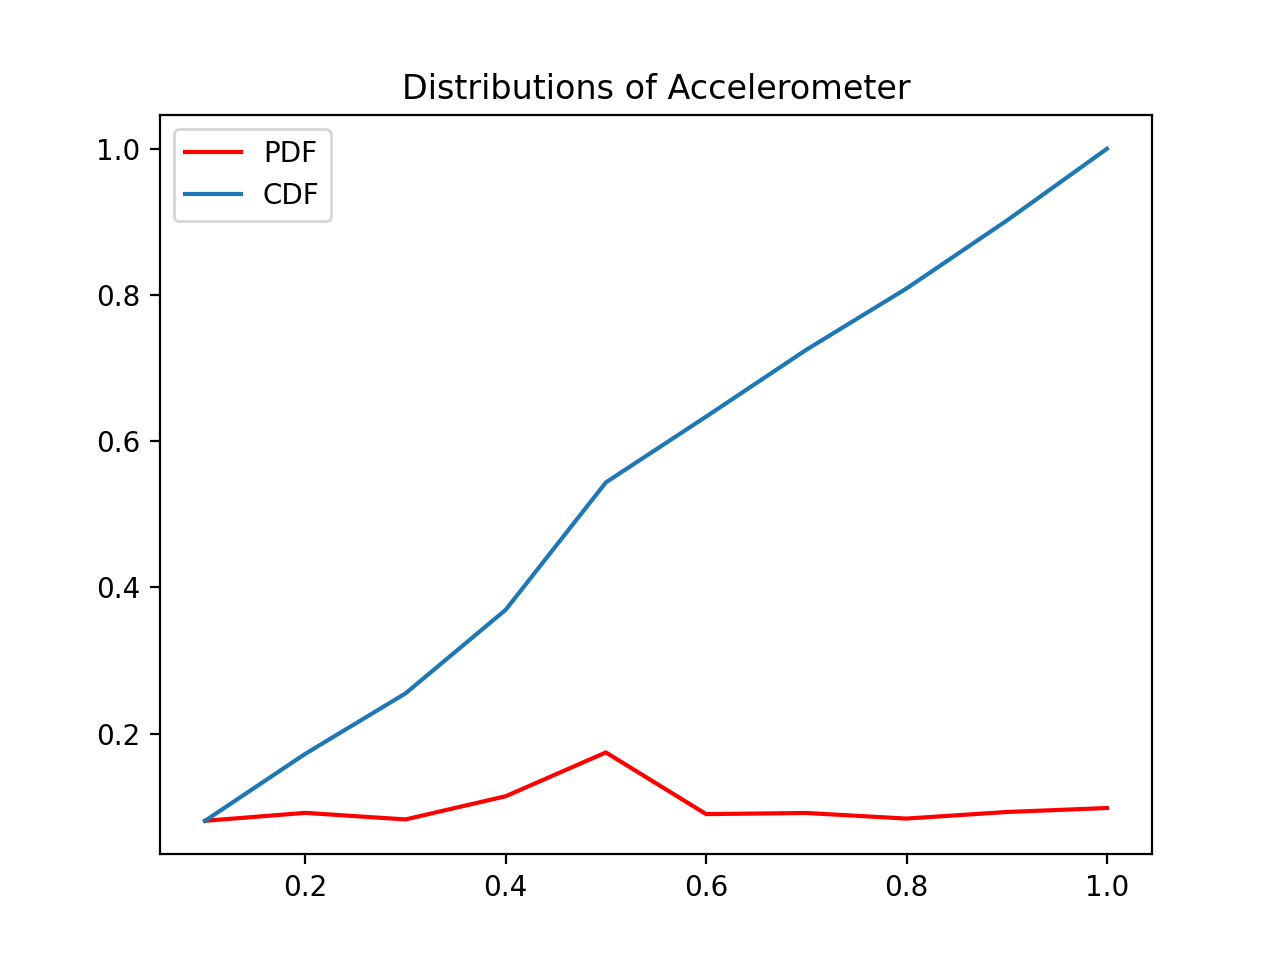

In [13]:
count, bins_count = np.histogram(F1, bins=10)
  
# finding the PDF of the histogram using count values
pdf = count / sum(count)
  
# using numpy np.cumsum to calculate the CDF
# We can also find using the PDF values by looping and adding
cdf = np.cumsum(pdf)
  
# plotting PDF and CDF
plt.title("Distributions of Accelerometer")
plt.plot(bins_count[1:], pdf, color="red", label="PDF")
plt.plot(bins_count[1:], cdf, label="CDF")
plt.legend()

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>


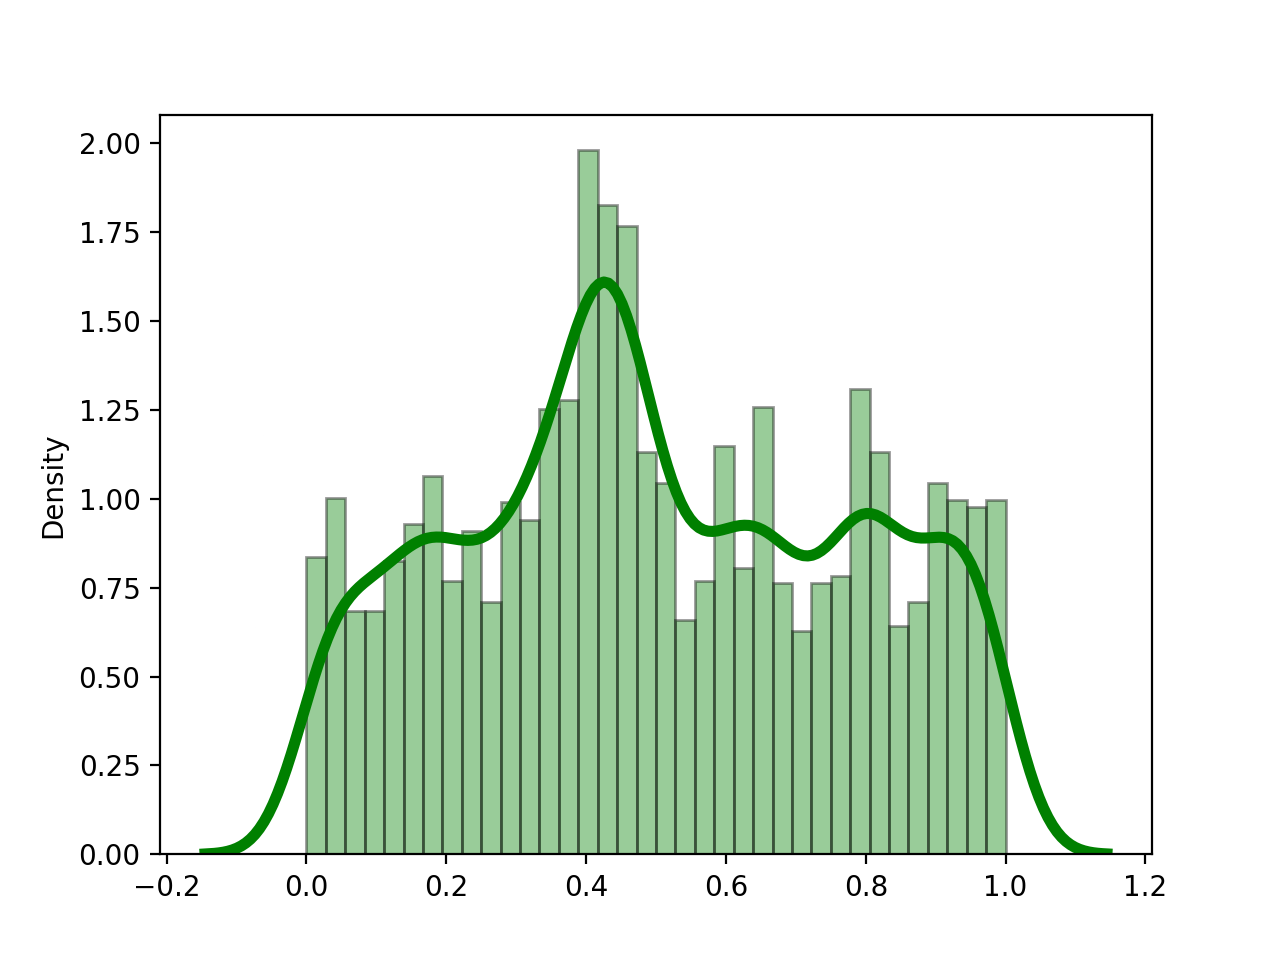

<AxesSubplot:ylabel='Density'>

In [12]:
sns.distplot(F1, norm_hist=True, kde=True, 
             bins=int(180/5), color = 'green', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

<IPython.core.display.Javascript object>


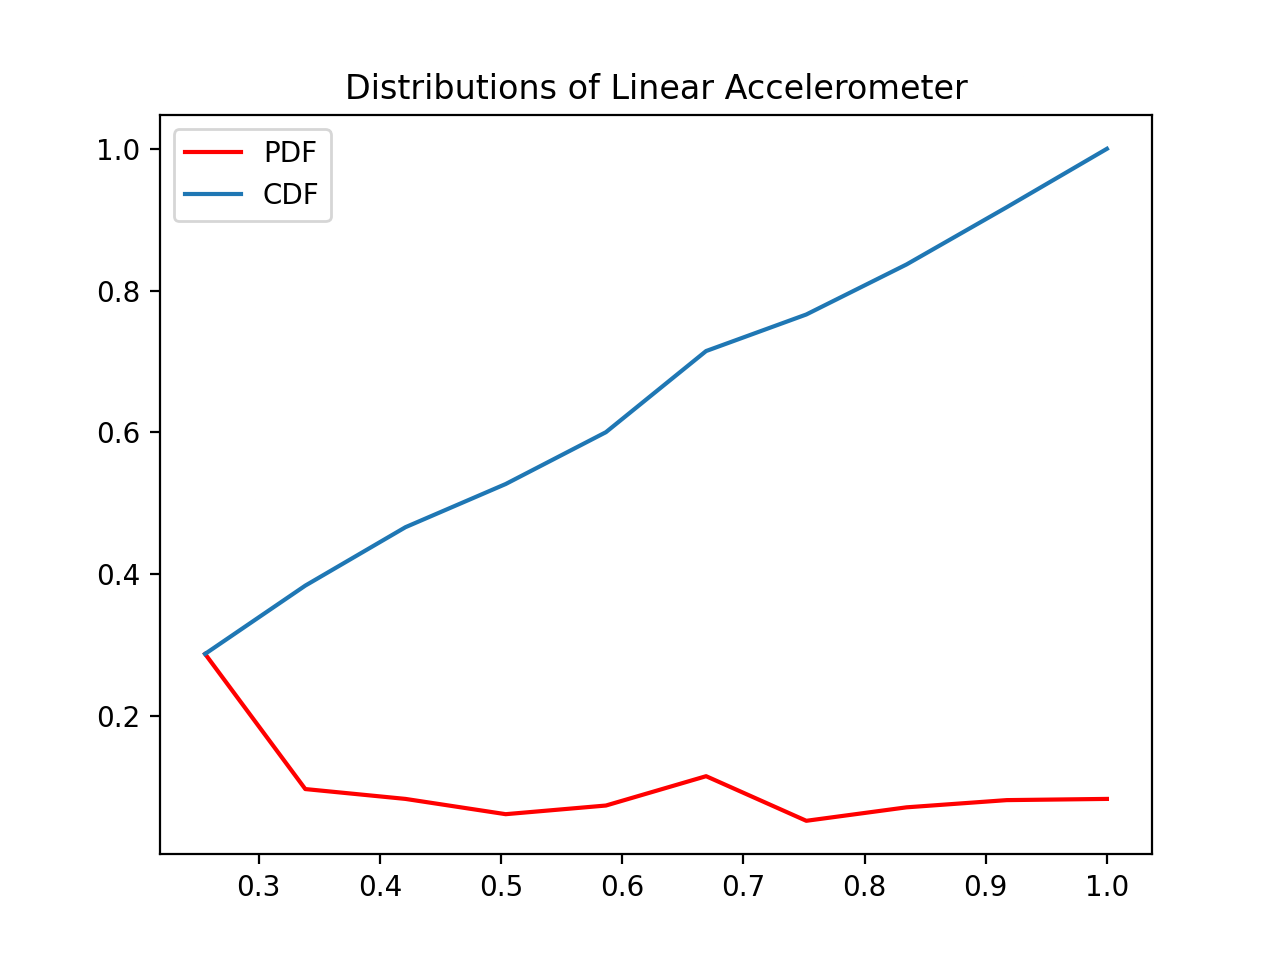

In [16]:
count, bins_count = np.histogram(F2, bins=10)
  
# finding the PDF of the histogram using count values
pdf = count / sum(count)
  
# using numpy np.cumsum to calculate the CDF
# We can also find using the PDF values by looping and adding
cdf = np.cumsum(pdf)
  
# plotting PDF and CDF
plt.title("Distributions of Linear Accelerometer")
plt.plot(bins_count[1:], pdf, color="red", label="PDF")
plt.plot(bins_count[1:], cdf, label="CDF")
plt.legend()

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>


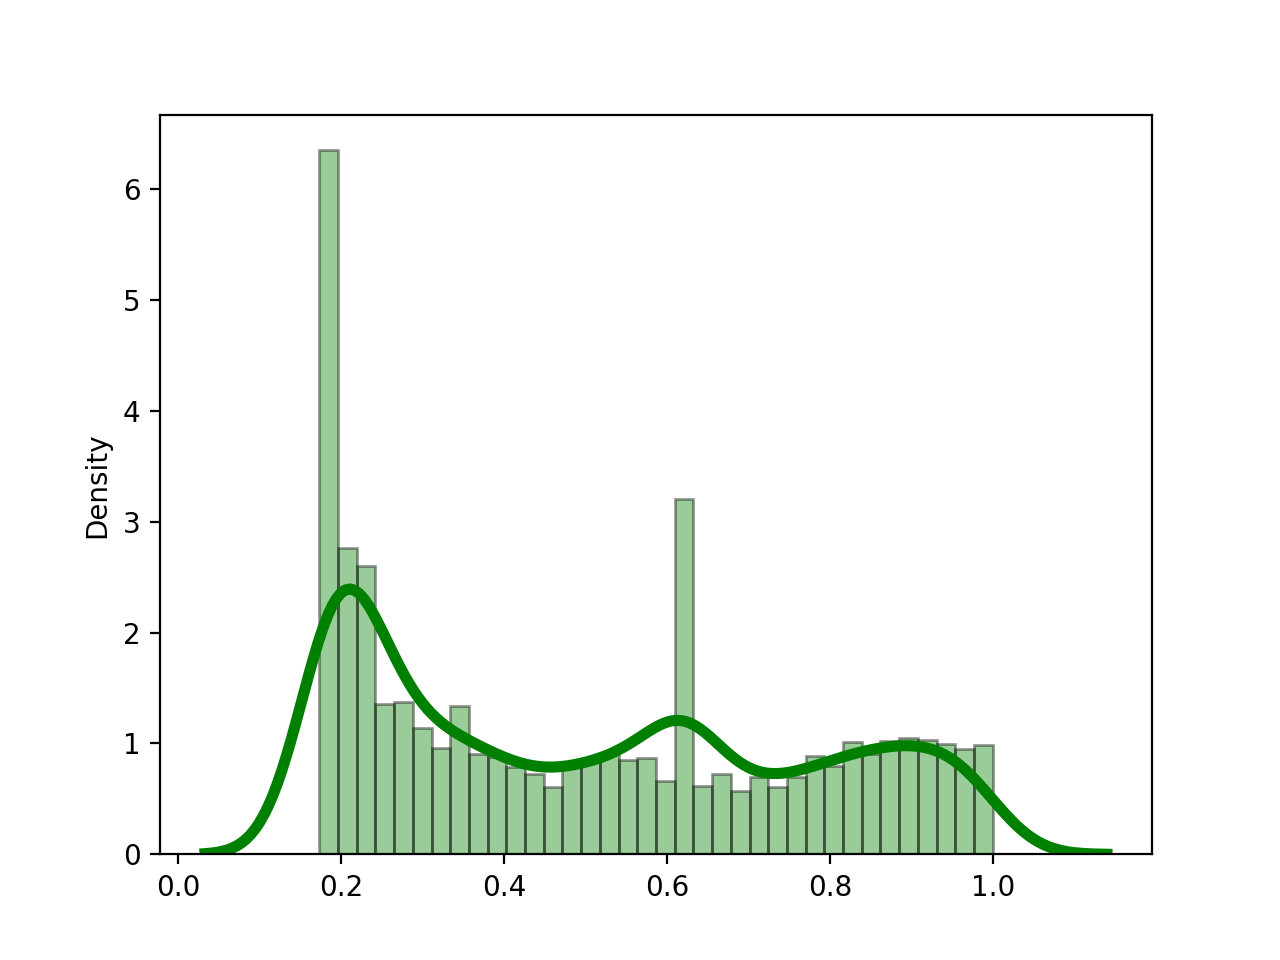

<AxesSubplot:ylabel='Density'>

In [14]:
sns.distplot(F2, hist=True, kde=True, 
             bins=int(180/5), color = 'green', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

<IPython.core.display.Javascript object>


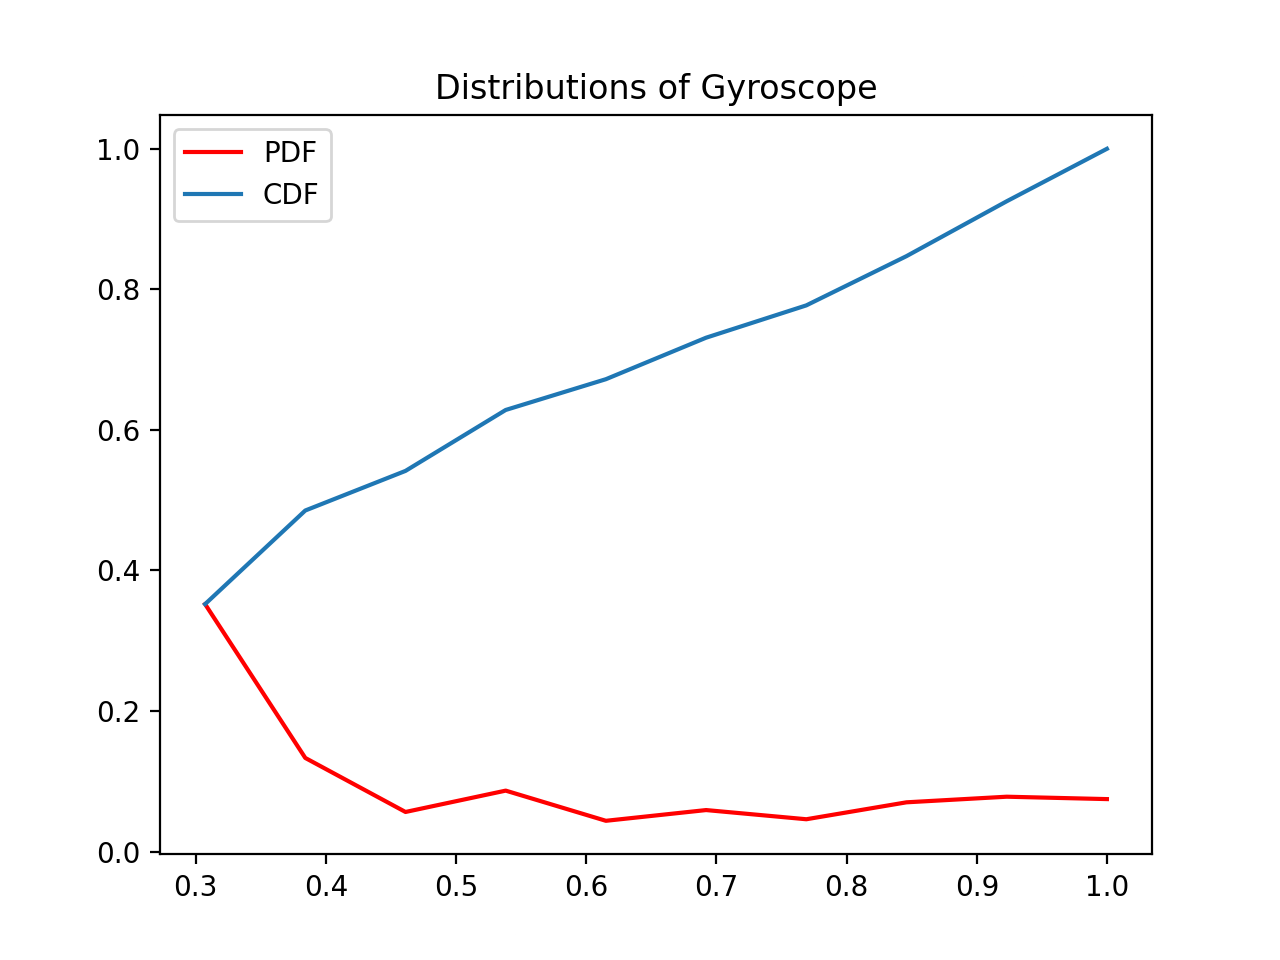

In [17]:
count, bins_count = np.histogram(F3, bins=10)
  
# finding the PDF of the histogram using count values
pdf = count / sum(count)
  
# using numpy np.cumsum to calculate the CDF
# We can also find using the PDF values by looping and adding
cdf = np.cumsum(pdf)
  
# plotting PDF and CDF
plt.title("Distributions of Gyroscope")
plt.plot(bins_count[1:], pdf, color="red", label="PDF")
plt.plot(bins_count[1:], cdf, label="CDF")
plt.legend()

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>


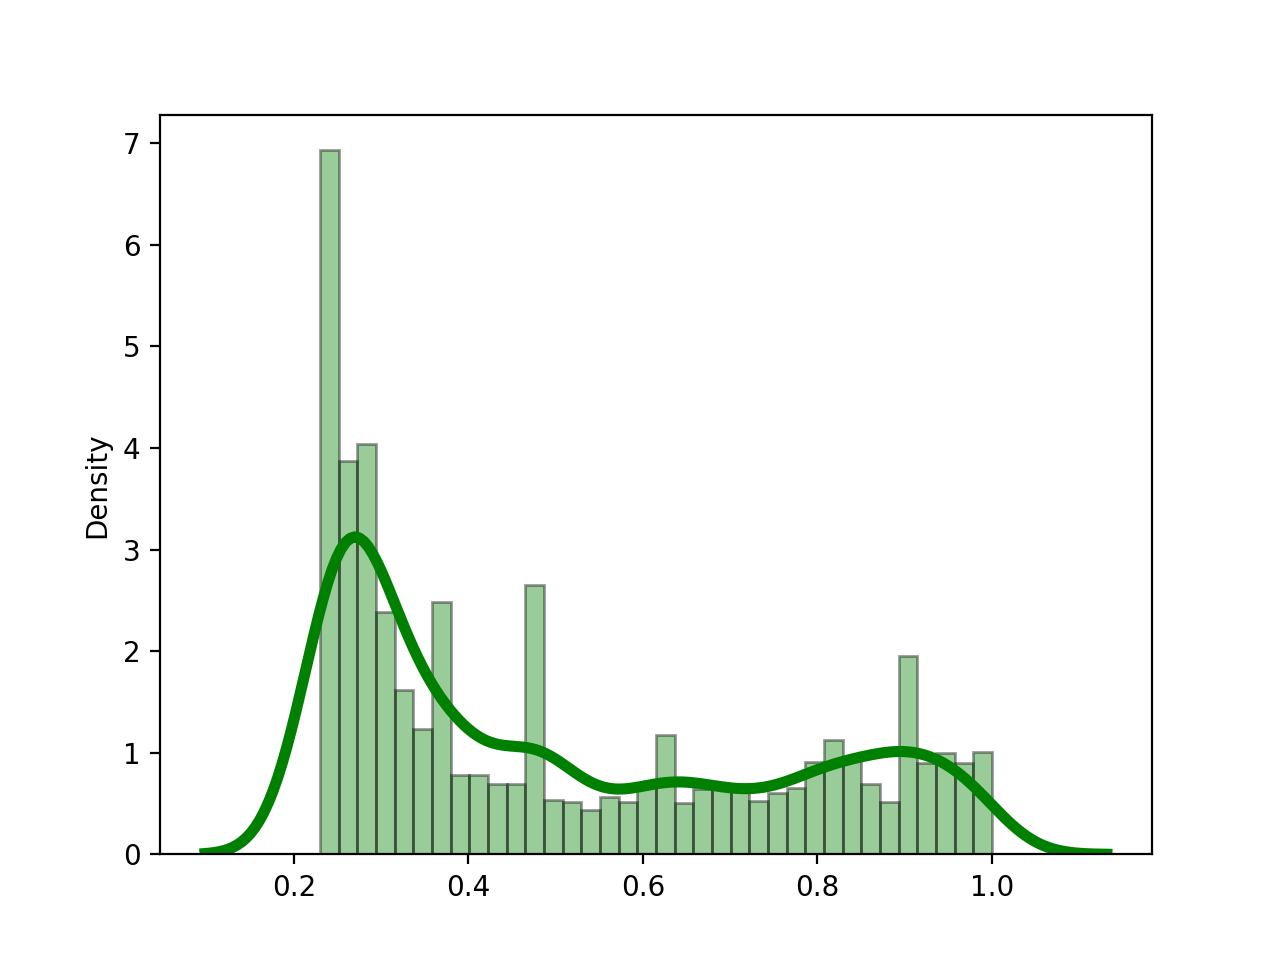

<AxesSubplot:ylabel='Density'>

In [15]:
sns.distplot(F3, hist=True, kde=True, 
             bins=int(180/5), color = 'green', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

In [12]:
f1 = regular.unis[0].probability_density(df['acc'])
f2 = regular.unis[1].probability_density(df['linear_acc'])
f3 = regular.unis[2].probability_density(df['gyr'])

In [13]:
trees = parameters['trees']
print('Number of the trees:',len(trees))

Number of the trees: 2


In [14]:
d1_r12 = trees[0]['edges'][0]
d1_r23 = trees[0]['edges'][1]
d1_r13_2 = trees[1]['edges'][0]

In [15]:
print('r12:',d1_r12['name'],'r23:',d1_r23['name'])
print('r13|2:',d1_r13_2['name'])

r12: CopulaTypes.GUMBEL r23: CopulaTypes.GUMBEL
r13|2: CopulaTypes.GUMBEL


## Gumbel - r12

In [16]:
print(d1_r12.keys())

dict_keys(['index', 'L', 'R', 'D', 'parents', 'neighbors', 'name', 'theta', 'tau', 'U', 'likelihood'])


In [17]:
d1_r12_marginal_data = np.array([d1_r12['U'][0],d1_r12['U'][1]])

In [18]:
d1_r12_marginal_data1 = []
for i in range(len(d1_r12['U'][0])):
    sin = []
    sin.append(d1_r12_marginal_data[0][i])
    sin.append(d1_r12_marginal_data[1][i])
    d1_r12_marginal_data1.append(sin)

In [19]:
d1_r12_marginal_data1 = np.array(d1_r12_marginal_data1)

In [20]:
gumbel = Gumbel()
gumbel.tau = d1_r12['tau']
gumbel.theta = d1_r12['theta']
d1_joint_r12 = gumbel.probability_density(d1_r12_marginal_data1)
print(d1_joint_r12)

[0.91275887 0.75844889 1.05669562 ... 1.46699268 1.11046443 1.38272667]


<IPython.core.display.Javascript object>


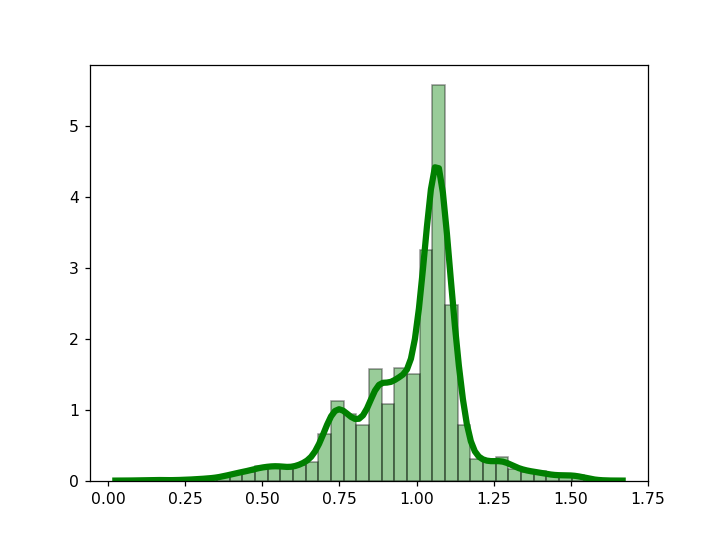

In [21]:
%matplotlib notebook
sns.distplot(d1_joint_r12, hist=True, kde=True,
             bins=int(180/5), color = 'green', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

## Gumbel-r23

In [22]:
print(d1_r23.keys())

dict_keys(['index', 'L', 'R', 'D', 'parents', 'neighbors', 'name', 'theta', 'tau', 'U', 'likelihood'])


In [23]:
d1_r23_marginal_data = np.array([d1_r23['U'][0],d1_r23['U'][1]])

In [24]:
d1_r23_marginal_data1 = []
for i in range(len(d1_r23['U'][0])):
    sin = []
    sin.append(d1_r23_marginal_data[0][i])
    sin.append(d1_r23_marginal_data[1][i])
    d1_r23_marginal_data1.append(sin)

In [25]:
d1_r23_marginal_data1 = np.array(d1_r23_marginal_data1)

In [26]:
gumbel = Gumbel()
gumbel.tau = d1_r23['tau']
gumbel.theta = d1_r23['theta']
d1_joint_r23 = gumbel.probability_density(d1_r23_marginal_data1)
print(d1_joint_r23)

[0.0136805  1.00522051 1.32782241 ... 1.69813861 0.01190983 0.00368343]


<IPython.core.display.Javascript object>


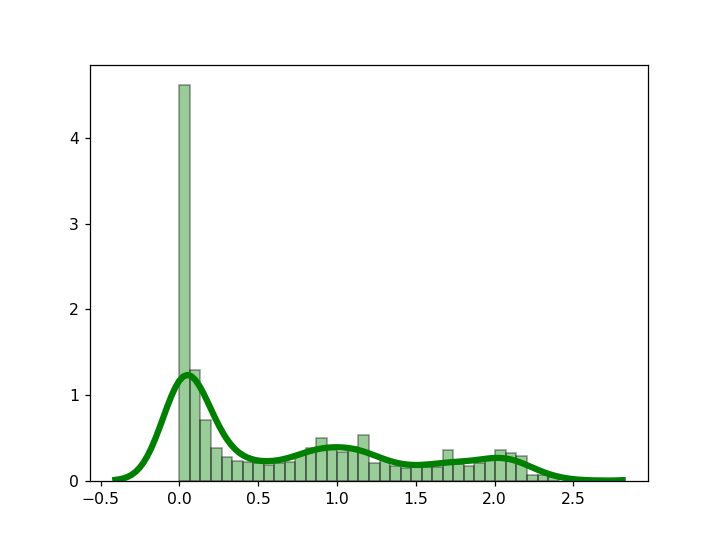

In [27]:
%matplotlib notebook
sns.distplot(d1_joint_r23, hist=True, kde=True,
             bins=int(180/5), color = 'green', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

## Gumbel-r13|2

In [28]:
print(d1_r13_2.keys())

dict_keys(['index', 'L', 'R', 'D', 'parents', 'neighbors', 'name', 'theta', 'tau', 'U', 'likelihood'])


In [29]:
d1_r13_2_marginal_data = np.array([d1_r13_2['U'][0],d1_r13_2['U'][1]])

In [30]:
d1_r13_2_marginal_data1 = []
for i in range(len(d1_r13_2['U'][0])):
    sin = []
    sin.append(d1_r13_2_marginal_data[0][i])
    sin.append(d1_r13_2_marginal_data[1][i])
    d1_r13_2_marginal_data1.append(sin)

In [31]:
d1_r13_2_marginal_data1 = np.array(d1_r13_2_marginal_data1)

In [32]:
gumbel = Gumbel()
gumbel.tau = d1_r13_2['tau']
gumbel.theta = d1_r13_2['theta']
d1_joint_r13_2 = gumbel.probability_density(d1_r13_2_marginal_data1)
print(d1_joint_r13_2)

[1.02239437 1.00699928 1.00543299 ... 1.00713629 1.09142433 0.96899213]


<IPython.core.display.Javascript object>


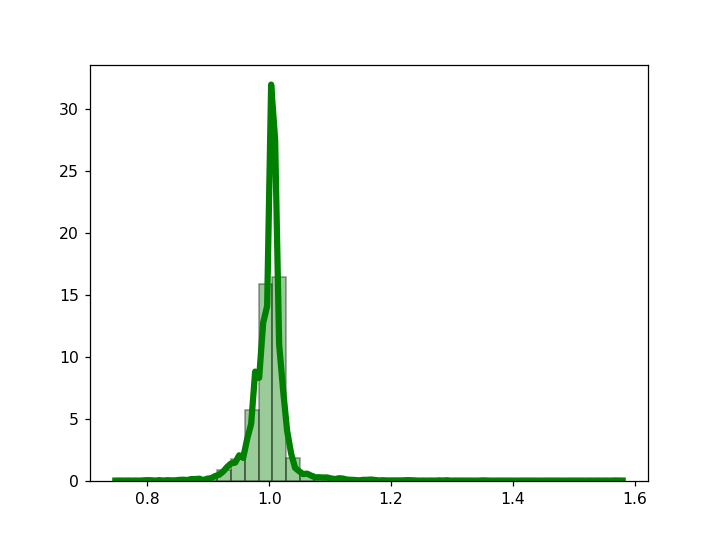

In [33]:
%matplotlib notebook
sns.distplot(d1_joint_r13_2, hist=True, kde=True,
             bins=int(180/5), color = 'green', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

In [34]:
joint_dist = [f1[i]*f2[i]*f3[i]*d1_joint_r12[i]*d1_joint_r23[i]*d1_joint_r13_2[i] for i in range(len(df))]

In [35]:
len(joint_dist)

5893

In [36]:
joint_dist

[0.014333027533738373,
 0.15663013072754398,
 3.4358730960613775,
 0.08280148814887214,
 3.696219380952495,
 0.51669915234761,
 0.09036170008788598,
 0.0019056421935845706,
 0.04800537676937851,
 3.6305862501568362,
 0.8490536196925426,
 0.028181582262584222,
 1.195886997323227,
 0.07296694750299793,
 5.264121600207299,
 0.010343060353335291,
 9.716491743298899e-05,
 1.8652580083916845,
 0.000709131294280831,
 5.467619075948103,
 0.00032741222708382295,
 0.000186036453723893,
 0.002114255551952113,
 3.3182932033263475,
 0.18719843914228856,
 0.00248382782782969,
 0.05008433438339936,
 1.4982416394145002,
 1.8767767836385192,
 0.5469562144400132,
 0.15953155762366797,
 1.887034417311527,
 0.001611940186950487,
 0.05195173114372228,
 2.55635403798227,
 0.058078735564479664,
 1.691685811434923,
 1.2529113833320014,
 0.7164289922254722,
 0.5256661494342172,
 0.00010699926388404357,
 0.39827446547145284,
 0.00026376115353516787,
 1.0373603851461408,
 0.5324700976622462,
 0.00044147193984796

<IPython.core.display.Javascript object>


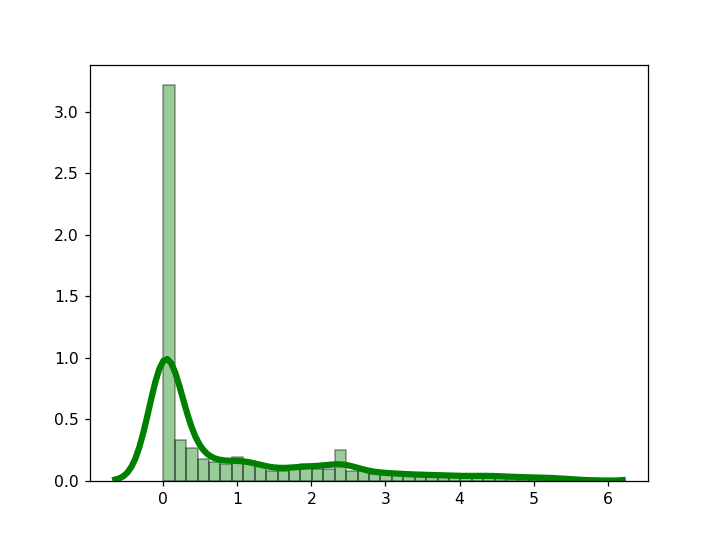

In [37]:
%matplotlib notebook
sns.distplot(joint_dist, hist=True, kde=True,
             bins=int(180/5), color = 'green', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

In [38]:
dataset = pd.DataFrame([joint_dist,data['target']]).transpose()
dataset.columns = ['joint','label']

In [39]:
dataset

,joint,label
0,0.014333,0.0
1,0.156630,0.0
2,3.435873,0.0
3,0.082801,0.0
4,3.696219,0.0
...,...,...
5888,0.000002,4.0
5889,0.006366,4.0
5890,0.000003,4.0
5891,0.000001,4.0


/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>


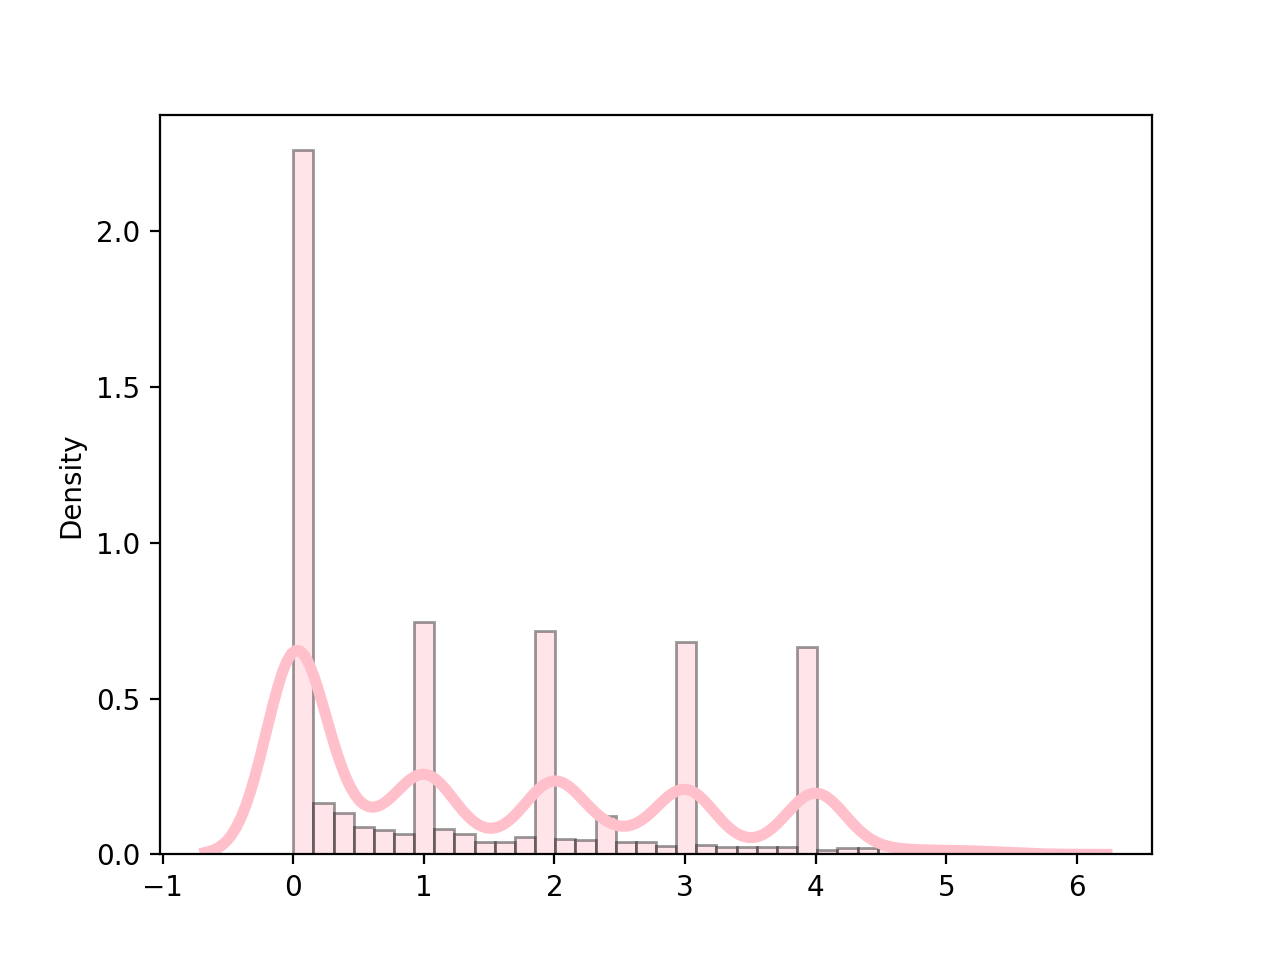

<AxesSubplot:ylabel='Density'>

In [17]:
%matplotlib notebook
sns.distplot(fused, hist=True, kde=True,
             bins=int(180/5), color = 'pink', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

In [40]:
dataset.to_csv('../Data/acc_linearacc_gyr.csv',index=0)

In [4]:
fused = pd.read_csv('../Data/acc_linearacc_gyr.csv')

In [6]:
grouped = fused.groupby(fused.label)
df_0 = grouped.get_group(0)
df_1 = grouped.get_group(1)
df_2 = grouped.get_group(2)
df_3 = grouped.get_group(3)
df_4 = grouped.get_group(4)

In [7]:
df_0.mean()

joint    0.919464
label    0.000000
dtype: float64

In [8]:
df_1.mean()

joint    0.595563
label    1.000000
dtype: float64

In [9]:
df_2.mean()

joint    1.4608
label    2.0000
dtype: float64

In [10]:
df_3.mean()

joint    1.607176
label    3.000000
dtype: float64

In [11]:
df_4.mean()

joint    0.031222
label    4.000000
dtype: float64

<IPython.core.display.Javascript object>


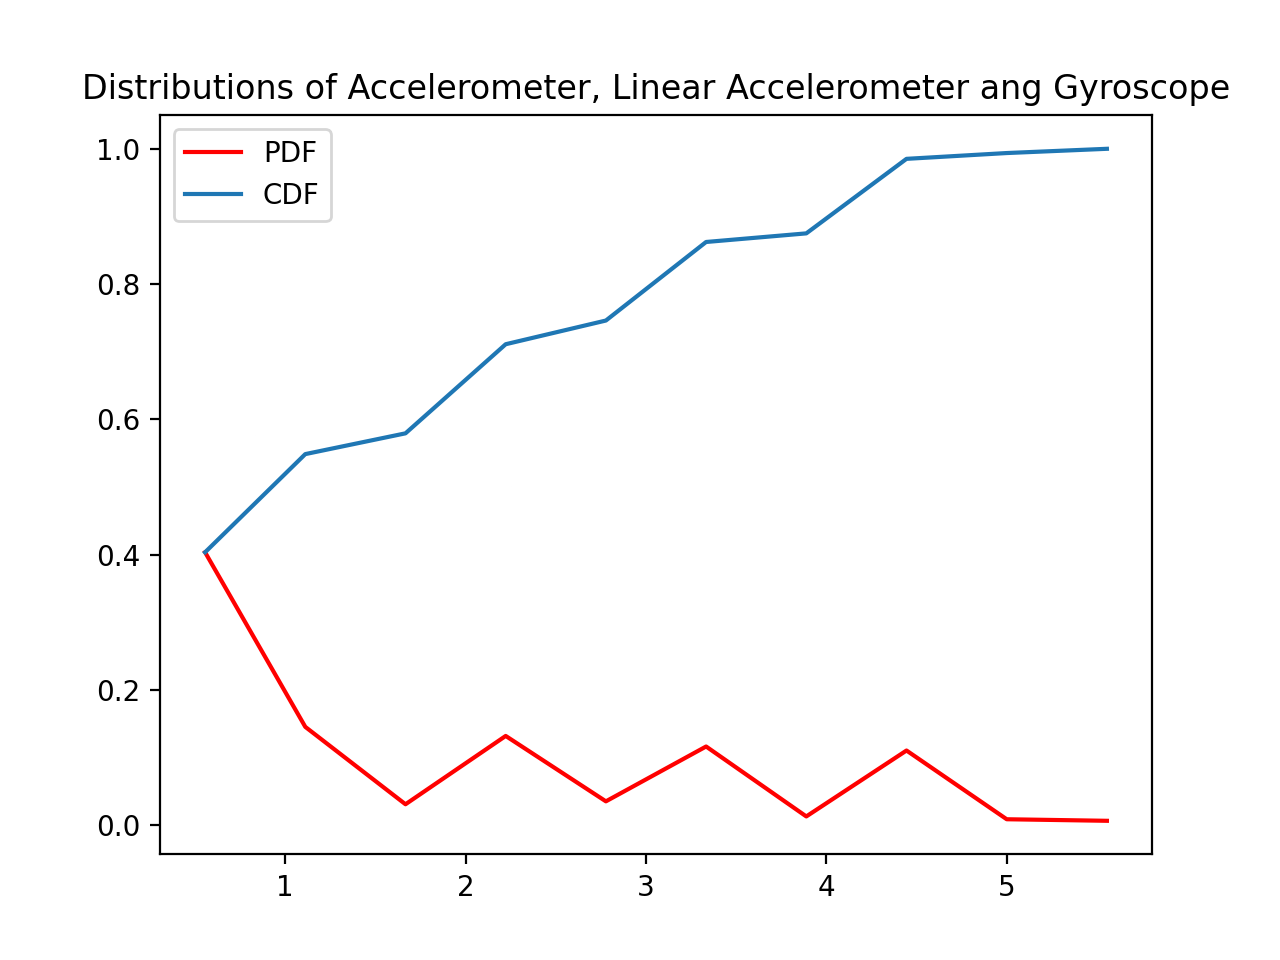

In [18]:
count, bins_count = np.histogram(fused, bins=10)
  
# finding the PDF of the histogram using count values
pdf = count / sum(count)
  
# using numpy np.cumsum to calculate the CDF
# We can also find using the PDF values by looping and adding
cdf = np.cumsum(pdf)
  
# plotting PDF and CDF
plt.title("Distributions of Accelerometer, Linear Accelerometer ang Gyroscope")
plt.plot(bins_count[1:], pdf, color="red", label="PDF")
plt.plot(bins_count[1:], cdf, label="CDF")
plt.legend()

## Classification

In [41]:
mean = pd.read_csv('../Data/final_mean.csv')
mean = mean.drop("Unnamed: 0",axis=1)
mean.head()

,acc,linear_acc,rotation,game_rotation,sound,speed,gravity,light,mag_field,gyr,orient,target
0,9.707576,0.395114,0.695759,0.643702,88.941299,12.106335,9.806641,0.0,45.299669,0.171560,289.098009,0
1,9.585344,0.955568,0.974789,0.575668,89.780316,6.750000,9.806650,1.0,47.775891,0.233873,166.814524,0
2,9.854207,0.221997,0.690608,0.728962,76.264572,9.091069,9.806642,0.0,45.873524,0.045484,292.815815,0
3,9.770933,1.341121,0.209953,0.361046,84.059241,5.368554,9.806649,0.0,45.303640,0.202622,338.585784,0
4,9.874786,0.614802,0.699299,0.746692,78.168628,6.454336,9.806624,0.0,41.311621,0.117408,361.257574,0


In [42]:
label = mean['target']
data = mean.drop(['acc','linear_acc','gyr','target'], axis=1)

In [43]:
data['joint'] = joint_dist

In [46]:
data

,rotation,game_rotation,sound,speed,gravity,light,mag_field,orient,joint
0,0.695759,0.643702,88.941299,12.106335,9.806641,0.000000,45.299669,289.098009,0.014333
1,0.974789,0.575668,89.780316,6.750000,9.806650,1.000000,47.775891,166.814524,0.156630
2,0.690608,0.728962,76.264572,9.091069,9.806642,0.000000,45.873524,292.815815,3.435873
3,0.209953,0.361046,84.059241,5.368554,9.806649,0.000000,45.303640,338.585784,0.082801
4,0.699299,0.746692,78.168628,6.454336,9.806624,0.000000,41.311621,361.257574,3.696219
...,...,...,...,...,...,...,...,...,...
5888,0.786107,0.842965,89.760856,0.000000,9.806650,4.500000,37.717219,268.220898,0.000002
5889,0.994797,0.996669,89.660043,1.000000,9.806650,0.000000,44.185833,197.554566,0.006366
5890,0.846044,0.847296,79.960222,1.058214,9.806631,3.642857,46.995312,287.530581,0.000003
5891,0.955082,0.745022,89.654900,1.500000,9.806650,5.000000,62.599094,200.887507,0.000001


In [44]:
X = data.iloc[:,:].values
y = label.values

In [45]:
X

array([[6.95759315e-01, 6.43702294e-01, 8.89412992e+01, ...,
        4.52996689e+01, 2.89098009e+02, 1.43330275e-02],
       [9.74788805e-01, 5.75668142e-01, 8.97803157e+01, ...,
        4.77758910e+01, 1.66814524e+02, 1.56630131e-01],
       [6.90607728e-01, 7.28962153e-01, 7.62645722e+01, ...,
        4.58735237e+01, 2.92815815e+02, 3.43587310e+00],
       ...,
       [8.46044222e-01, 8.47296186e-01, 7.99602225e+01, ...,
        4.69953123e+01, 2.87530581e+02, 2.57272480e-06],
       [9.55081561e-01, 7.45022400e-01, 8.96548998e+01, ...,
        6.25990944e+01, 2.00887507e+02, 1.08002813e-06],
       [9.90901693e-01, 9.19814577e-01, 8.97124413e+01, ...,
        4.39834194e+01, 2.60716040e+02, 1.39309447e-06]])

In [47]:
y

array([0, 0, 0, ..., 4, 4, 4], dtype=int64)

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [49]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [50]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

RandomForestClassifier()

In [51]:
y_pred  =  classifier.predict(X_test)

In [52]:
y_pred

array([4, 0, 0, ..., 4, 4, 4], dtype=int64)

In [53]:
y_test

array([4, 0, 0, ..., 4, 4, 4], dtype=int64)

In [54]:
from sklearn.metrics import confusion_matrix,accuracy_score
accuracy_score(y_test,y_pred)

0.9906700593723494

<IPython.core.display.Javascript object>


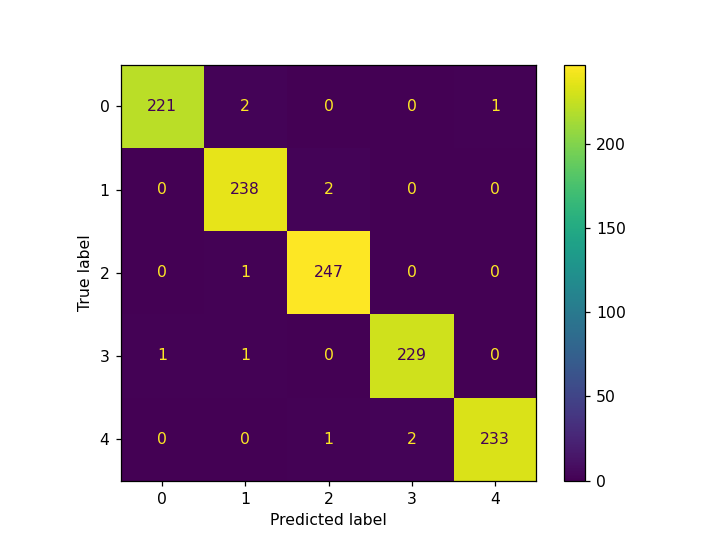

In [55]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier, X_test, y_test)  

In [56]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='micro')

0.9906700593723494

## Classification

In [23]:
joint_dist = pd.read_csv('../Data/acc_linearacc_gyr.csv')
#joint_dist = joint_dist.drop("Unnamed: 0",axis=1)
joint_dist.head()

,joint,label
0,0.014333,0.0
1,0.156630,0.0
2,3.435873,0.0
3,0.082801,0.0
4,3.696219,0.0


In [76]:
mean = pd.read_csv('../Data/final_mean.csv')
mean = mean.drop("Unnamed: 0",axis=1)
mean.head()

,acc,linear_acc,rotation,game_rotation,sound,speed,gravity,light,mag_field,gyr,orient,target
0,9.707576,0.395114,0.695759,0.643702,88.941299,12.106335,9.806641,0.0,45.299669,0.171560,289.098009,0
1,9.585344,0.955568,0.974789,0.575668,89.780316,6.750000,9.806650,1.0,47.775891,0.233873,166.814524,0
2,9.854207,0.221997,0.690608,0.728962,76.264572,9.091069,9.806642,0.0,45.873524,0.045484,292.815815,0
3,9.770933,1.341121,0.209953,0.361046,84.059241,5.368554,9.806649,0.0,45.303640,0.202622,338.585784,0
4,9.874786,0.614802,0.699299,0.746692,78.168628,6.454336,9.806624,0.0,41.311621,0.117408,361.257574,0


In [77]:
label = mean['target']
#data = mean.drop(['acc','linear_acc','gyr','target','rotation','game_rotation','light','gravity','mag_field'], axis=1)
data = mean.drop(['acc','linear_acc','gyr','target','gravity','mag_field'], axis=1)

In [78]:
rot = pd.read_csv('../Data/rot_frank.csv')
rot = rot.drop(["Unnamed: 0","target"],axis=1)
rot.head()

In [79]:
data['joint'] = joint_dist['joint']
#data['rot'] = rot

In [80]:
data

,rotation,game_rotation,sound,speed,light,orient,joint
0,0.695759,0.643702,88.941299,12.106335,0.000000,289.098009,0.014333
1,0.974789,0.575668,89.780316,6.750000,1.000000,166.814524,0.156630
2,0.690608,0.728962,76.264572,9.091069,0.000000,292.815815,3.435873
3,0.209953,0.361046,84.059241,5.368554,0.000000,338.585784,0.082801
4,0.699299,0.746692,78.168628,6.454336,0.000000,361.257574,3.696219
...,...,...,...,...,...,...,...
5888,0.786107,0.842965,89.760856,0.000000,4.500000,268.220898,0.000002
5889,0.994797,0.996669,89.660043,1.000000,0.000000,197.554566,0.006366
5890,0.846044,0.847296,79.960222,1.058214,3.642857,287.530581,0.000003
5891,0.955082,0.745022,89.654900,1.500000,5.000000,200.887507,0.000001


In [81]:
X = data.iloc[:,:].values
y = label.values

In [82]:
X

array([[6.95759315e-01, 6.43702294e-01, 8.89412992e+01, ...,
        0.00000000e+00, 2.89098009e+02, 1.43330275e-02],
       [9.74788805e-01, 5.75668142e-01, 8.97803157e+01, ...,
        1.00000000e+00, 1.66814524e+02, 1.56630131e-01],
       [6.90607728e-01, 7.28962153e-01, 7.62645722e+01, ...,
        0.00000000e+00, 2.92815815e+02, 3.43587310e+00],
       ...,
       [8.46044222e-01, 8.47296186e-01, 7.99602225e+01, ...,
        3.64285714e+00, 2.87530581e+02, 2.57272480e-06],
       [9.55081561e-01, 7.45022400e-01, 8.96548998e+01, ...,
        5.00000000e+00, 2.00887507e+02, 1.08002813e-06],
       [9.90901693e-01, 9.19814577e-01, 8.97124413e+01, ...,
        1.35157933e+02, 2.60716040e+02, 1.39309447e-06]])

In [83]:
y

array([0, 0, 0, ..., 4, 4, 4])

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [85]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [86]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

RandomForestClassifier()

In [87]:
y_pred  =  classifier.predict(X_test)

In [88]:
y_pred

array([4, 0, 0, ..., 4, 4, 4])

In [89]:
y_test

array([4, 0, 0, ..., 4, 4, 4])

In [90]:
from sklearn.metrics import confusion_matrix,accuracy_score
accuracy_score(y_test,y_pred)

0.9864291772688719

<IPython.core.display.Javascript object>


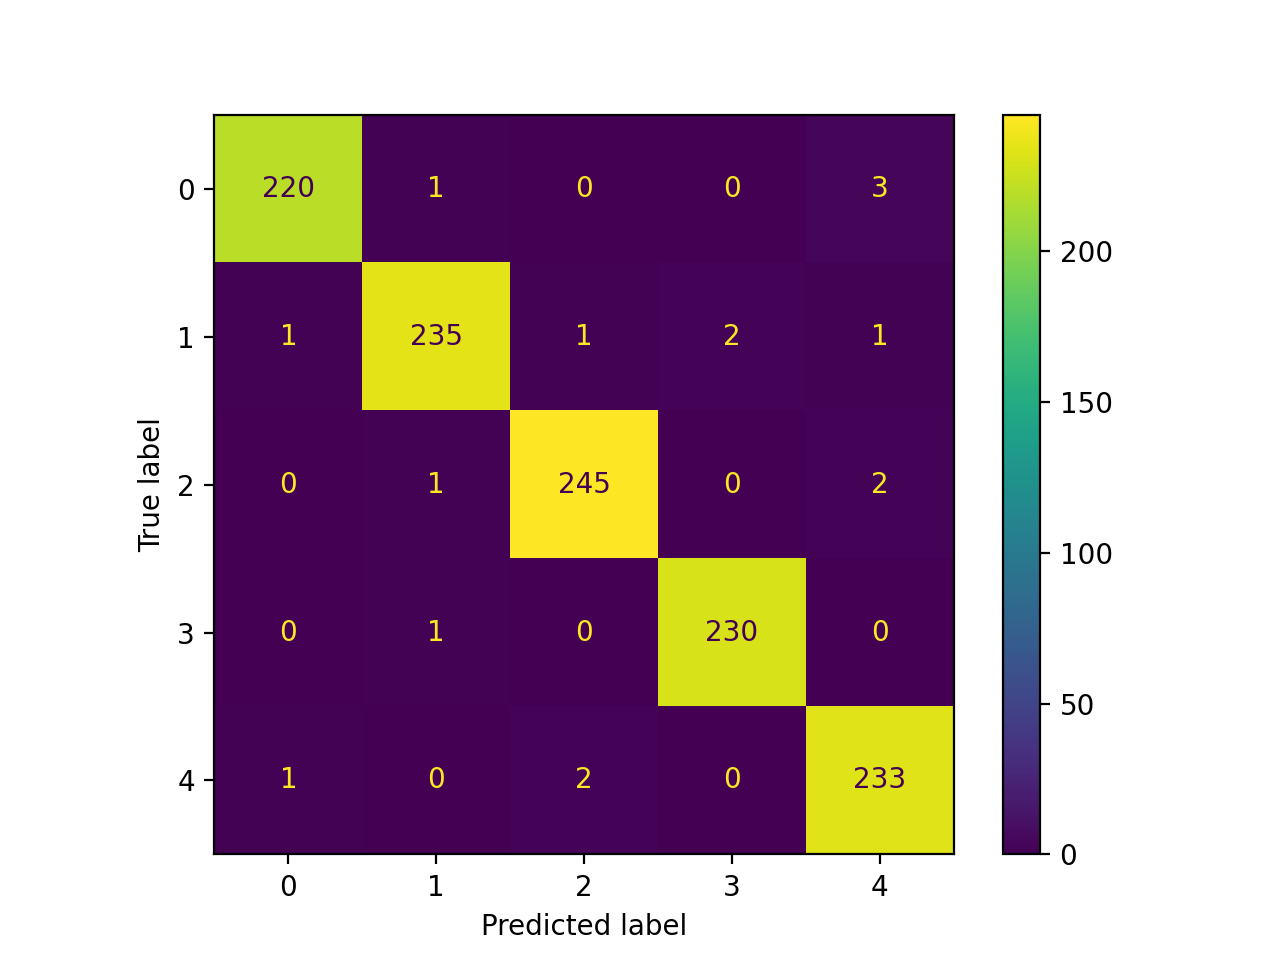

In [91]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier, X_test, y_test)  

In [92]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='micro')

0.9864291772688719